# Livia Zalilla

## Milestone 2


## Research question/interests

We are interested in exploring the global production of marine fisheries and its effects on climate change through overexploitation of fish stocks within the past 50 years. We will compare the trends of fishing production levels in different countries and regions.

My main topic of interest is the impact of industrial fishing production on the global population and sustainable fish stock. I will be comparing country and ocean region in terms of their industrial fishing production, overexploited fish stocks, and biologically sustainable fish stocks. 

My analysis will be focused on the following research questions:
- How will sustainable fish stock in different countries/regions be impacted by overfishing? 
- Which countries/regions have the highest fishing production? Which have the lowest? 
- Which countries/regions have the highest seafood supply? Which have the lowest? 

In [318]:
## Importing the dataset

import numpy as np
import pandas as pd

aquaculture = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
capturedVsAquaculture= pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
captured = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fishery-production.csv", sep=",")
seafoodConsumptionpercapita = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-and-seafood-consumption-per-capita.csv", sep=",")
sustainableFishStocks = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")
globalFisheryBySector = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/global-fishery-catch-by-sector.csv", sep=",")
seafoodProduction = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/seafood-and-fish-production-thousand-tonnes.csv", sep=",")

seafoodConsumptionpercapita.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


## Milestone 3


In [230]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Dataset 1: Captured Fishery Production 

### Task 1: Conduct an Exploratory Data Analysis (EDA) on your dataset

#### Understanding the variables 
We will begin by exploring our first dataset to give us a better understanding of each variable. We will be retrieving the count of columns, rows, and unique values of our dataset. We will also obtain the count, mean, standard deviation, min, and max for numeric variables. 

In [327]:
df1 = captured
df1.head()

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


In [328]:
print(df1.shape)
print(df1.columns)

(14516, 4)
Index(['Entity', 'Code', 'Year', 'Capture fisheries production (metric tons)'], dtype='object')


In [329]:
df1.nunique(axis=0)

Entity                                          264
Code                                            217
Year                                             59
Capture fisheries production (metric tons)    11346
dtype: int64

In [331]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14516.0,1.989891e+03,1.700087e+01,1960.0,1975.0,1990.5,2005.000000,2.018000e+03
Capture fisheries production (metric tons),14516.0,2.842715e+06,9.232678e+06,0.0,4105.0,63488.0,856965.122803,9.515958e+07


### Task 2: Set up an “Analysis Pipeline”

#### Cleaning the dataset
We have just finished getting a better understand of the variables in our dataset. Next, we will clean up our dataset by getting rid of redundant variables, null values, and outliers. From the previous table, I have noticed that the minimum value of capture fisheries production is 0 metric tons. This means I will have to remove rows with null values from the dataset. 

In [332]:
df1_filtered = df1.dropna(axis=0)
df1_filtered.shape

(11743, 4)

Since we are only interested in comparing country/regions, I will be removing Code since we have Entity because it would be considered redundant to keep both. Then, I will be removing all rows that contain 'World'. 

In [238]:
df1_cleaned = df1_filtered.copy().drop(['Code'], axis=1)
indexEnt = df1_cleaned.loc[lambda row : row['Entity']=='World'].index
df1_cleaned = df1_cleaned.copy()
df1_cleaned.drop(indexEnt, inplace=True)
df1_cleaned

,Entity,Year,Capture fisheries production (metric tons)
0,Afghanistan,1960,200.0
1,Afghanistan,1961,300.0
2,Afghanistan,1962,300.0
3,Afghanistan,1963,300.0
4,Afghanistan,1964,300.0
...,...,...,...
14511,Zimbabwe,2014,144885.0
14512,Zimbabwe,2015,130399.0
14513,Zimbabwe,2016,129202.0
14514,Zimbabwe,2017,100710.0


In [239]:
#Renaming columns

df1_rename = df1_cleaned.rename(columns={'Entity': 'Country', 'Capture fisheries production (metric tons)': 'Capture fisheries production'})
df1_rename

,Country,Year,Capture fisheries production
0,Afghanistan,1960,200.0
1,Afghanistan,1961,300.0
2,Afghanistan,1962,300.0
3,Afghanistan,1963,300.0
4,Afghanistan,1964,300.0
...,...,...,...
14511,Zimbabwe,2014,144885.0
14512,Zimbabwe,2015,130399.0
14513,Zimbabwe,2016,129202.0
14514,Zimbabwe,2017,100710.0


In [240]:
#Sorting values

df1_sort = df1_rename.sort_values(by=['Capture fisheries production'], ascending = False)
df1_sort

,Country,Year,Capture fisheries production
2641,China,2015,16647935.0
2640,China,2014,16363366.0
2642,China,2016,16019262.0
2639,China,2013,15633567.0
2643,China,2017,15576685.0
...,...,...,...
368,Andorra,1984,0.0
369,Andorra,1985,0.0
370,Andorra,1986,0.0
371,Andorra,1987,0.0


In [241]:
df1_sort.Country.unique()

array(['China', 'Peru', 'Japan', 'Russia', 'Chile', 'Indonesia',
       'United States', 'India', 'Norway', 'Vietnam', 'Thailand',
       'South Korea', 'Philippines', 'Iceland', 'South Africa', 'Myanmar',
       'Denmark', 'Bangladesh', 'Canada', 'Mexico', 'Malaysia', 'Morocco',
       'Spain', 'Argentina', 'United Kingdom', 'Colombia', 'North Korea',
       'Ecuador', 'Ukraine', 'Mauritania', 'Germany', 'Brazil', 'Nigeria',
       'France', 'Iran', 'Namibia', 'Poland', 'Faeroe Islands',
       'Cambodia', 'Turkey', 'New Zealand', 'Pakistan', 'Venezuela',
       'Angola', 'Portugal', 'Netherlands', 'Oman', 'Latvia', 'Senegal',
       'Sri Lanka', 'Ghana', 'Italy', 'Lithuania', 'Uganda', 'Greenland',
       'Egypt', 'Tanzania', 'Ireland', 'Mozambique', 'Sweden', 'Belize',
       'Estonia', 'Papua New Guinea', 'Guinea', 'Panama', 'Cameroon',
       'Australia', 'Yemen', 'Democratic Republic of Congo', 'Cuba',
       'Malawi', 'Hong Kong', 'Vanuatu', 'Romania', 'Kenya', 'Georgia',
      

We will be retrieving the top 10 countries with the highest capture fisheries production into a new dataframe. 

In [344]:
df1_t = df1_sort.loc[df1_sort.apply(lambda x: x.Country in ['China', 'Peru', 'Japan', 'Russia', 'Chile', 'Indonesia',
       'United States', 'India', 'Norway', 'Vietnam'], axis=1)]
df1_t

,Country,Year,Capture fisheries production
2641,China,2015,16647935.0
2640,China,2014,16363366.0
2642,China,2016,16019262.0
2639,China,2013,15633567.0
2643,China,2017,15576685.0
...,...,...,...
14244,Vietnam,1980,460500.0
2528,Chile,1961,443159.0
14224,Vietnam,1960,435500.0
14225,Vietnam,1961,433800.0


We will also be retrieving the bottom 10 countries with the lowest capture fisheries production into a new dataframe.

In [243]:
df1_b = df1_sort.loc[df1.apply(lambda x: x.Country in ['Bhutan',
       'Saint Martin (French part)', 'Eswatini', 'Lesotho', 'Monaco',
       'Gibraltar', 'Liechtenstein', 'San Marino', 'Luxembourg',
       'Andorra'], axis=1)]
df1_b

,Country,Year,Capture fisheries production
1390,Bhutan,1969,150.0
1391,Bhutan,1970,150.0
1392,Bhutan,1971,150.0
1393,Bhutan,1972,150.0
1394,Bhutan,1973,150.0
...,...,...,...
368,Andorra,1984,0.0
369,Andorra,1985,0.0
370,Andorra,1986,0.0
371,Andorra,1987,0.0


#### Analyzing relationships between variables
We have just finished cleaning up the data in our dataset. Next, we will analyze the relationship between the variables by displaying the dataset in three different visualizations. 

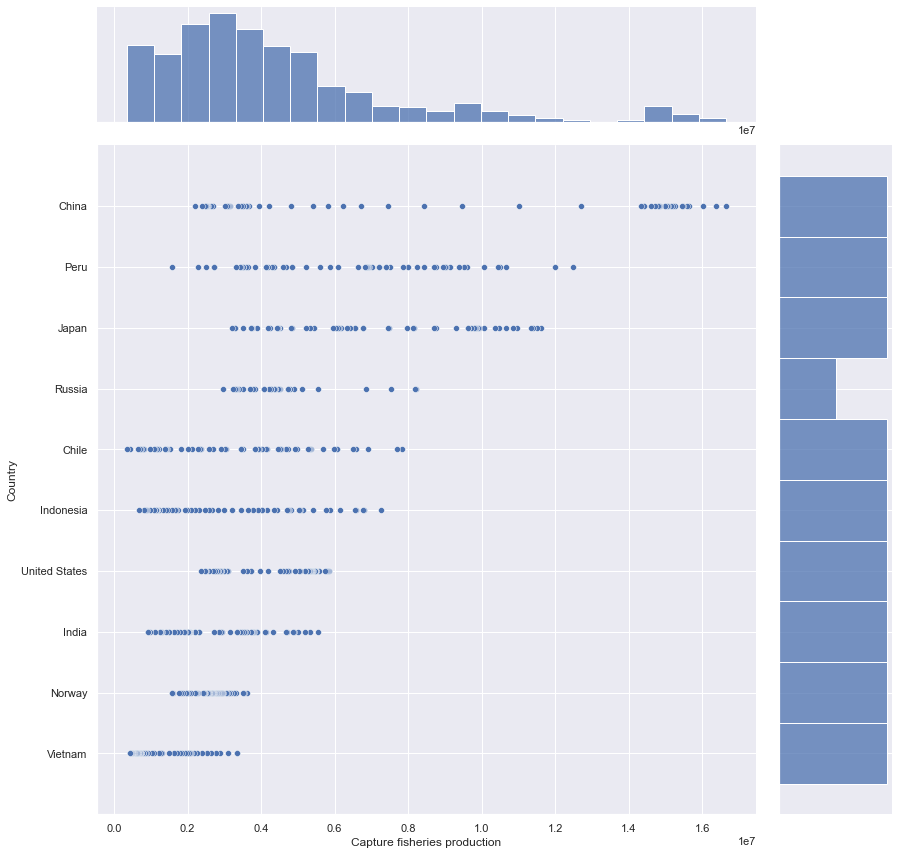

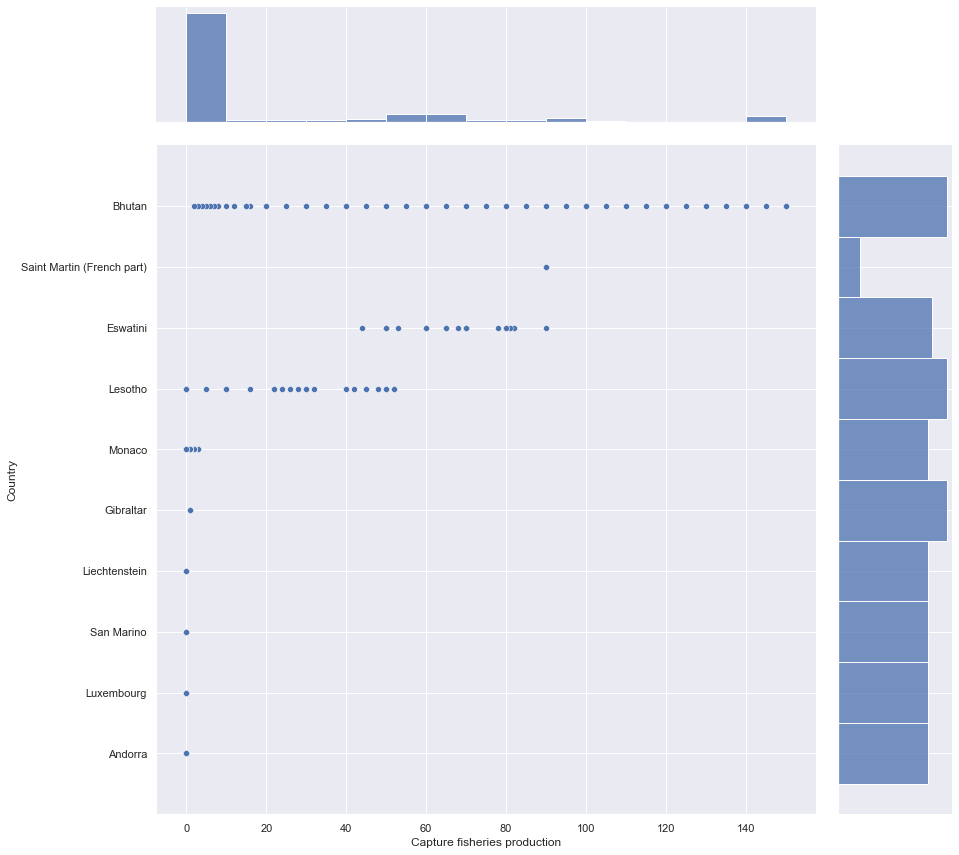

In [307]:
sns.jointplot(data = df1_t, x = 'Capture fisheries production', y = 'Country', kind='scatter').fig.set_size_inches(13,13)
sns.jointplot(data = df1_b, x = 'Capture fisheries production', y = 'Country', kind='scatter').fig.set_size_inches(13,13)

This visualization shows us the amount of capture fisheries production of the top 10 and bottom 10 countries by country. We can observe that China has the largest and Andorra has the least production of fish out of the other countries. 

<AxesSubplot:xlabel='Year', ylabel='Capture fisheries production'>

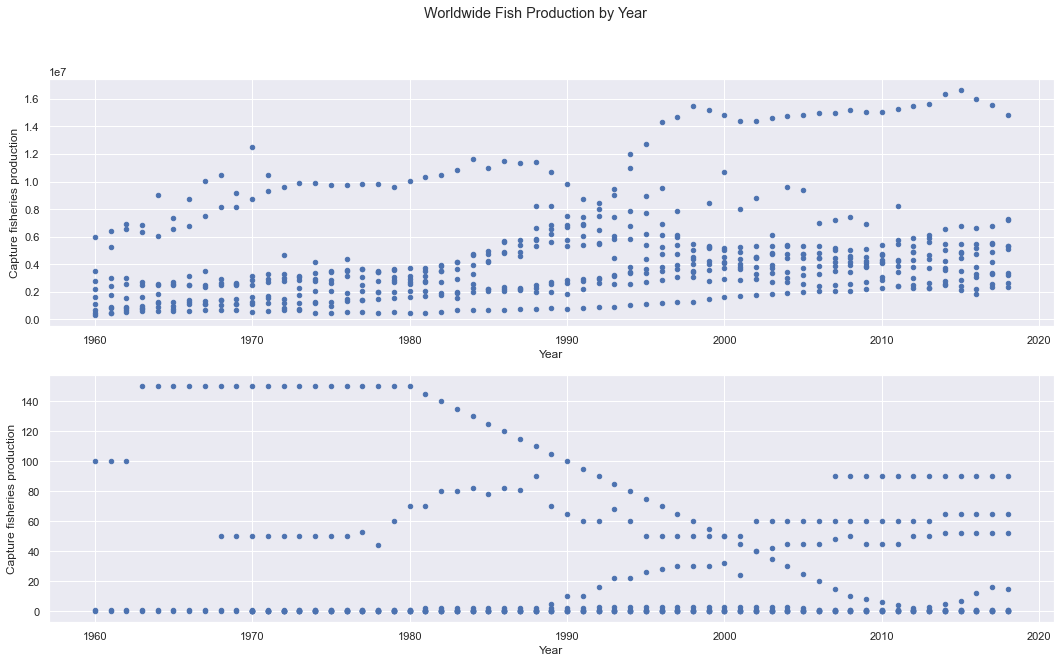

In [361]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.suptitle('Worldwide Fish Production by Year')
df1_t.plot(ax=axes[0], kind='scatter', x='Year', y='Capture fisheries production')
df1_b.plot(ax=axes[1], kind='scatter', x='Year', y='Capture fisheries production')

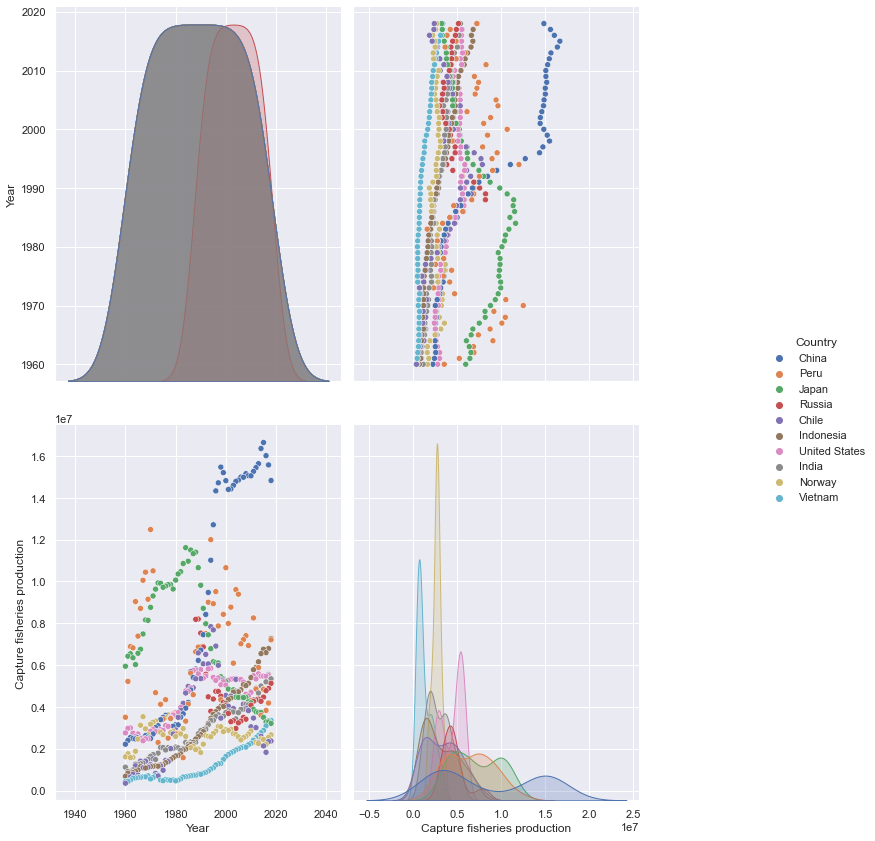

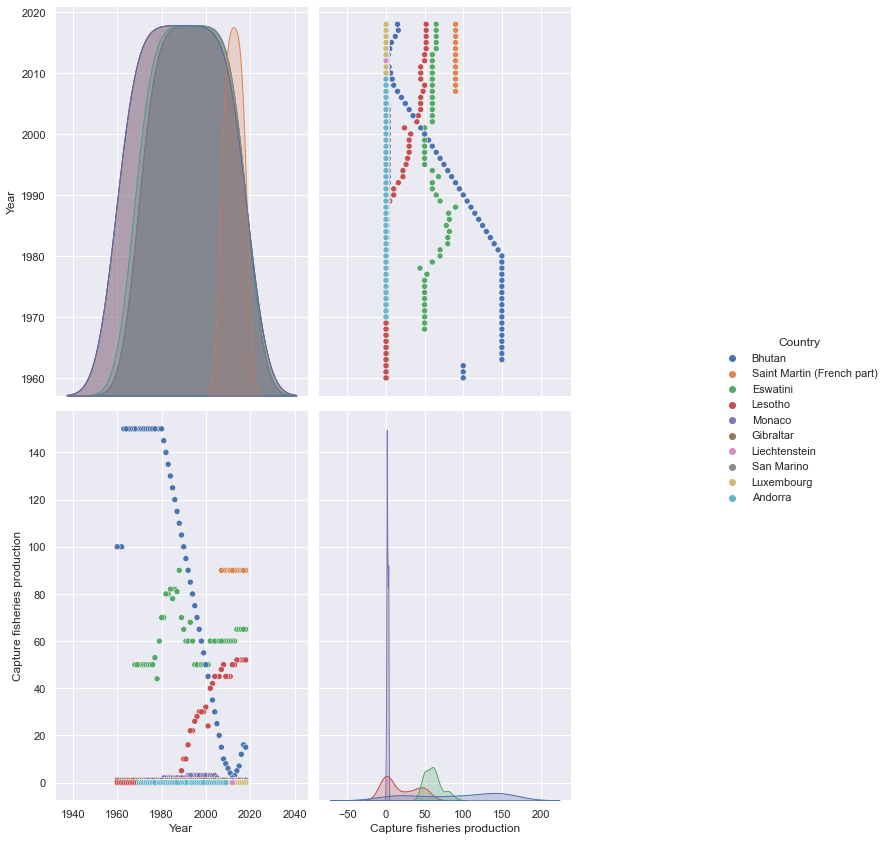

In [309]:
sns.pairplot(df1_t, hue='Country').fig.set_size_inches(13,13)
sns.pairplot(df1_b, hue='Country').fig.set_size_inches(13,13)

These visualizations shows us the capture fisheries production of the top 10 and bottom 10 countries by year. We can observe that the fishing production of the top 10 countries continues to increase over the years. Meanwhile, the fishing production of the bottom 10 countries continues to decrease over the years. Therefore, the countries that have established higher production rates have a better chance of increasing their fishing production than others. We can predict this trend will continue over the future years. 

## Dataset 2: Seafood Consumption per Capita
We will now repeat the tasks we had completed for Dataset 1 on Dataset 2.

### Task 1: Conduct an Exploratory Data Analysis (EDA) on your dataset

In [319]:
df2 = seafoodConsumptionpercapita
df2.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


In [321]:
print(df2.shape)
print(df2.columns)

(11028, 4)
Index(['Entity', 'Code', 'Year',
       'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'],
      dtype='object')


In [322]:
df2.nunique(axis=0)

Entity                                                             216
Code                                                               182
Year                                                                57
Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)    3991
dtype: int64

In [324]:
df2.describe()

,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
count,11028.000000,11028.000000
mean,1989.461824,16.670872
std,16.320065,17.056281
min,1961.000000,0.000000
25%,1975.000000,5.340000
50%,1990.000000,11.995000
75%,2004.000000,22.512500
max,2017.000000,191.750000


### Task 2: Set up an “Analysis Pipeline”

In [334]:
df2_filtered = df2.dropna(axis=0)
df2_filtered.shape

(9294, 4)

In [335]:
df2_cleaned = df2_filtered.copy().drop(['Code'], axis=1)
indexEnt = df2_cleaned.loc[lambda row : row['Entity']=='World'].index
df2_cleaned = df2_cleaned.copy()
df2_cleaned.drop(indexEnt, inplace=True)
df2_cleaned

,Entity,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,1961,0.03
1,Afghanistan,1962,0.03
2,Afghanistan,1963,0.03
3,Afghanistan,1964,0.03
4,Afghanistan,1965,0.03
...,...,...,...
11023,Zimbabwe,2013,2.82
11024,Zimbabwe,2014,3.39
11025,Zimbabwe,2015,3.82
11026,Zimbabwe,2016,3.79


In [337]:
#Renaming columns

df2_rename = df2_cleaned.rename(columns={'Entity': 'Country', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Seafood supply'})
df2_rename

,Country,Year,Seafood supply
0,Afghanistan,1961,0.03
1,Afghanistan,1962,0.03
2,Afghanistan,1963,0.03
3,Afghanistan,1964,0.03
4,Afghanistan,1965,0.03
...,...,...,...
11023,Zimbabwe,2013,2.82
11024,Zimbabwe,2014,3.39
11025,Zimbabwe,2015,3.82
11026,Zimbabwe,2016,3.79


In [339]:
#Sorting values

df2_sort = df2_rename.sort_values(by=['Seafood supply'], ascending = False)
df2_sort

,Country,Year,Seafood supply
6007,Maldives,2010,191.75
6008,Maldives,2011,190.99
5999,Maldives,2002,189.23
6009,Maldives,2012,188.49
6010,Maldives,2013,184.88
...,...,...,...
9840,Timor,1984,0.00
9817,Timor,1961,0.00
9818,Timor,1962,0.00
9819,Timor,1963,0.00


In [340]:
df2_sort.Country.unique()

array(['Maldives', 'Iceland', 'Kiribati', 'Hong Kong', 'Japan',
       'Portugal', 'Macao', 'Malaysia', 'Solomon Islands', 'Guyana',
       'Brunei', 'Saint Kitts and Nevis', 'South Korea',
       'Antigua and Barbuda', 'Samoa', 'Myanmar', 'Norway', 'Vanuatu',
       'Polynesia', 'Gabon', 'French Polynesia', 'Bermuda', 'Spain',
       'Indonesia', 'Sao Tome and Principe', 'Lithuania', 'Fiji',
       'Cambodia', 'Cape Verde', 'Melanesia', 'Barbados', 'Taiwan',
       'Dominica', 'Grenada', 'Ghana', 'Jamaica', 'Saint Lucia', 'China',
       'Congo', 'Vietnam', 'North Korea', 'Philippines', 'Finland',
       'Senegal', 'Sierra Leone', 'Bahamas', 'Luxembourg', 'Sweden',
       'France', 'Latvia', 'Thailand', 'Malta', 'Sri Lanka',
       'Netherlands Antilles', 'Suriname', 'USSR', 'Gambia', 'Italy',
       'Oman', 'New Zealand', 'New Caledonia', 'United Arab Emirates',
       'Australia', 'Peru', 'Estonia', 'Angola', 'Belgium', 'Israel',
       'Denmark', 'Laos', 'Greece', 'Canada', 'Cyprus

In [343]:
df2_t = df2_sort.loc[df2_sort.apply(lambda x: x.Country in ['Maldives', 'Iceland', 'Kiribati', 'Hong Kong', 'Japan',
       'Portugal', 'Macao', 'Malaysia', 'Solomon Islands', 'Guyana'], axis=1)]
df2_t

,Country,Year,Seafood supply
6007,Maldives,2010,191.75
6008,Maldives,2011,190.99
5999,Maldives,2002,189.23
6009,Maldives,2012,188.49
6010,Maldives,2013,184.88
...,...,...,...
5736,Macao,1967,11.45
5733,Macao,1964,10.61
5732,Macao,1963,8.47
5731,Macao,1962,6.08


In [345]:
df2_b = df2_sort.loc[df2_sort.apply(lambda x: x.Country in ['Lesotho',
       'Kyrgyzstan', 'Nepal', 'Pakistan', 'Uzbekistan', 'Mongolia',
       'Sudan', 'Tajikistan', 'Ethiopia', 'Afghanistan'], axis=1)]
df2_b

,Country,Year,Seafood supply
5541,Lesotho,1983,3.03
5269,Kyrgyzstan,2014,3.00
5572,Lesotho,2014,2.94
6836,Nepal,2015,2.89
6837,Nepal,2016,2.87
...,...,...,...
5523,Lesotho,1965,0.00
5522,Lesotho,1964,0.00
5521,Lesotho,1963,0.00
5520,Lesotho,1962,0.00


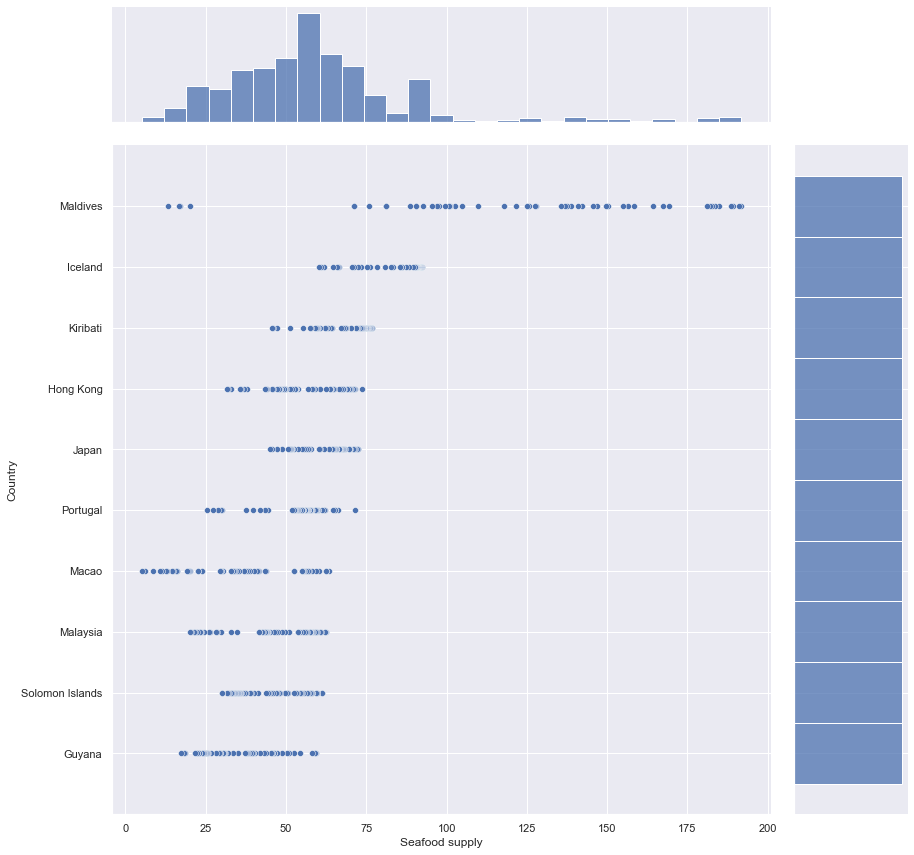

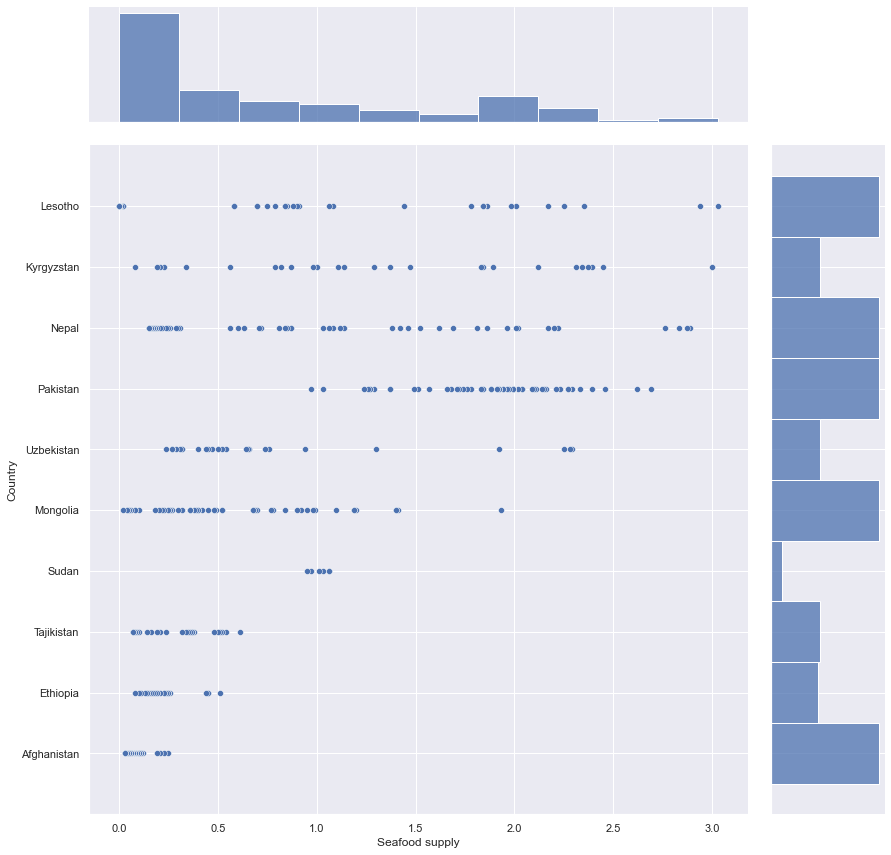

In [347]:
sns.jointplot(data = df2_t, x = 'Seafood supply', y = 'Country', kind='scatter').fig.set_size_inches(13,13)
sns.jointplot(data = df2_b, x = 'Seafood supply', y = 'Country', kind='scatter').fig.set_size_inches(13,13)

This visualization shows us the amount of seafood supply of the top 10 and bottom 10 countries by country. We can observe that the Maldives has the largest and Afghanistan has the amount of seafood supply in comparison to other countries. 

<AxesSubplot:xlabel='Year', ylabel='Seafood supply'>

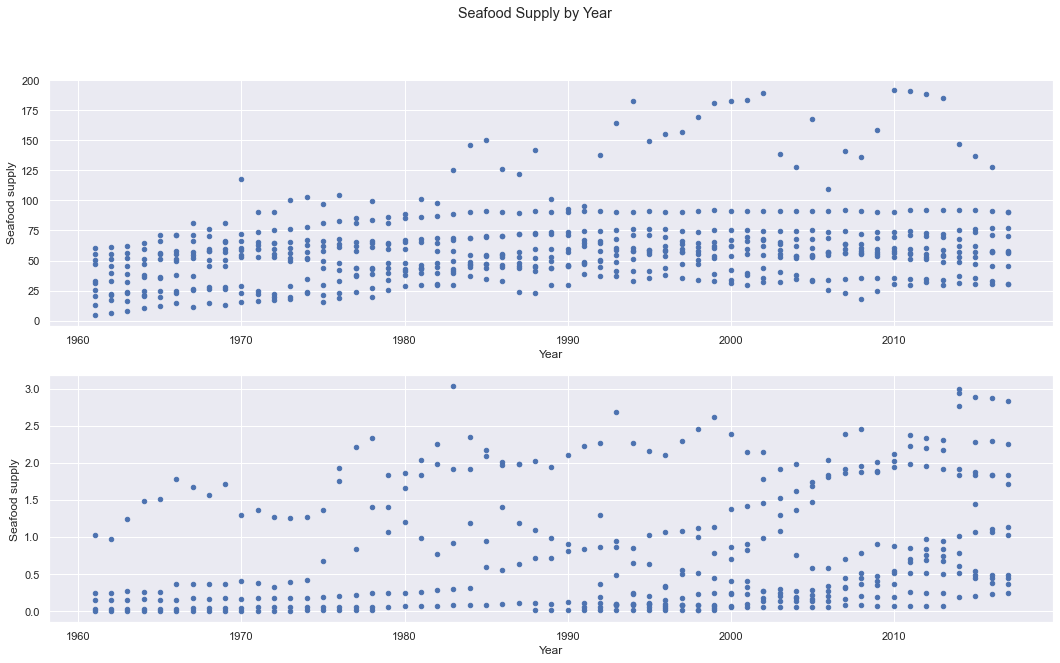

In [349]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.suptitle('Seafood Supply by Year')
df2_t.plot(ax=axes[0], kind='scatter', x='Year', y='Seafood supply')
df2_b.plot(ax=axes[1], kind='scatter', x='Year', y='Seafood supply')

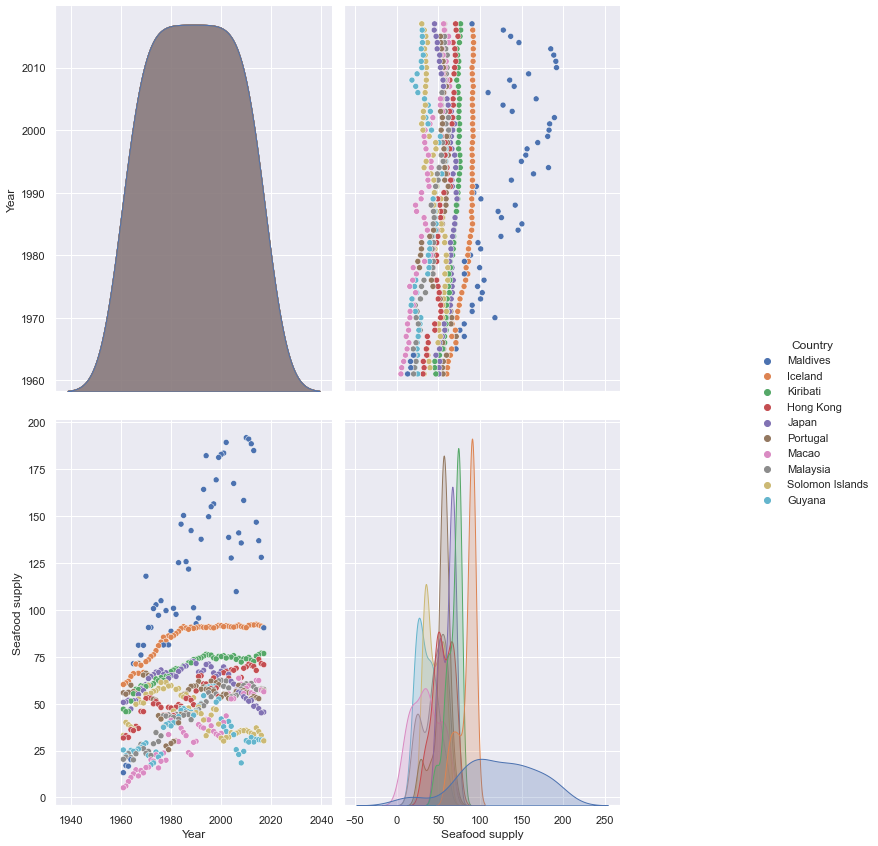

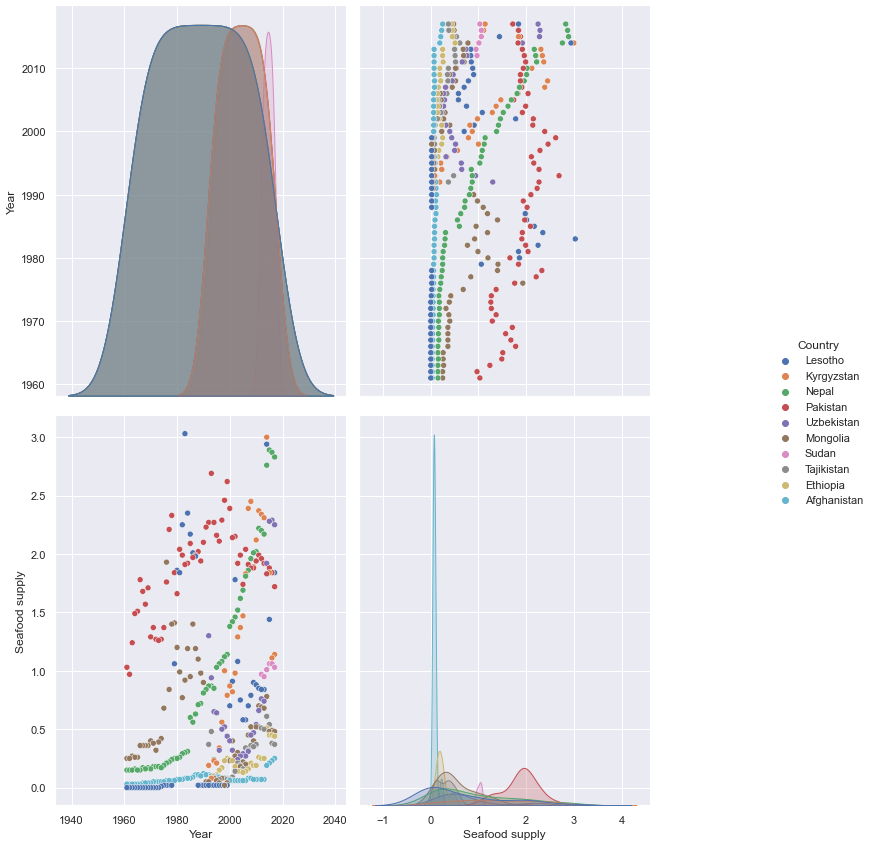

In [350]:
sns.pairplot(df2_t, hue='Country').fig.set_size_inches(13,13)
sns.pairplot(df2_b, hue='Country').fig.set_size_inches(13,13)

These visualizations shows us the seafood supply of the top 10 and bottom 10 countries by year. We can observe that the seafood supply of the top 10 countries continues to decrease over the recent years. Meanwhile, the fishing production of the bottom 10 countries have also decreased over the recent years. Therefore, the countries that have the highest supply of seafood have a the same chance of increasing their supply with those countries that don't. We can predict this trend will continue over the future years. 

### Wrangling/Joining Dataframes

## Task 3. Method Chaining and writing Python programs

In [352]:
def load_and_process_df1(url):
    
    df1 = pd.read_csv(url, sep=',')
    
    indexEnt = df1_cleaned.loc[lambda row : row['Entity']=='World'].index
    
    df1_1 = {
        df1
        .dropna(axis=0)

    }
    df1_2 = {
        df1_1
        .copy().drop(['Code'], axis=1)

    }
    df1_3 = {
        df1_2
        .copy().drop(indexEnt, inplace=True)
        .rename(columns={'Entity': 'Country', 'Capture fisheries production (metric tons)': 'Capture fisheries production'})

    }
    df1_4 = {
        df1_3
        .sort_values(by=['Capture fisheries production'], ascending = False)

    }
    return df1_4
load_and_process_df1("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fishery-production.csv")


,Country,Year,Capture fisheries production
2641,China,2015,16647935.0
2640,China,2014,16363366.0
2642,China,2016,16019262.0
2639,China,2013,15633567.0
2643,China,2017,15576685.0
...,...,...,...
368,Andorra,1984,0.0
369,Andorra,1985,0.0
370,Andorra,1986,0.0
371,Andorra,1987,0.0


In [353]:
def load_and_process_df2(url):
    
    df2 = pd.read_csv(url, sep=',')
    
    indexEnt = df2_cleaned.loc[lambda row : row['Entity']=='World'].index
    
    df2_1 = {
        df2
        .dropna(axis=0)

    }
    df2_2 = {
        df2_1
        .copy().drop(['Code'], axis=1)

    }
    df2_3 = {
        df2_2
        .copy().drop(indexEnt, inplace=True)
        .rename(columns={'Entity': 'Country', 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)': 'Seafood supply'})
        
    }
    df2_4 = {
        df2_3
        .sort_values(by=['Seafood supply'], ascending = False)

    }
    return df1_4
load_and_process_df2("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-and-seafood-consumption-per-capita.csv")

,Country,Year,Seafood supply
6007,Maldives,2010,191.75
6008,Maldives,2011,190.99
5999,Maldives,2002,189.23
6009,Maldives,2012,188.49
6010,Maldives,2013,184.88
...,...,...,...
9840,Timor,1984,0.00
9817,Timor,1961,0.00
9818,Timor,1962,0.00
9819,Timor,1963,0.00


In [354]:
import project_functions_livia as pl

cleaned_df1 = pl.load_and_process_df1("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fishery-production.csv")
cleaned_df1

,Country,Year,Capture fisheries production
2641,China,2015,16647935.0
2640,China,2014,16363366.0
2642,China,2016,16019262.0
2639,China,2013,15633567.0
2643,China,2017,15576685.0
...,...,...,...
368,Andorra,1984,0.0
369,Andorra,1985,0.0
370,Andorra,1986,0.0
371,Andorra,1987,0.0


In [355]:
cleaned_df2 = pl.load_and_process_df2("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-and-seafood-consumption-per-capita.csv")
cleaned_df2

,Country,Year,Seafood supply
6007,Maldives,2010,191.75
6008,Maldives,2011,190.99
5999,Maldives,2002,189.23
6009,Maldives,2012,188.49
6010,Maldives,2013,184.88
...,...,...,...
9840,Timor,1984,0.00
9817,Timor,1961,0.00
9818,Timor,1962,0.00
9819,Timor,1963,0.00


## Analysis

My primary interest is the impact of industrial fishing production on the global population and sustainable fish stock. My analysis was focused on answering the question: "How will different countries/regions be impacted by overfishing?". I retrieved my data from two seperate datasets and focused on two different variables, 'Capture fisheries production' and 'Seafood supply'. As I observed the trends for capture fisheries production, I can see an increase of the top countries with high fishing production over the years. Meanwhile, the bottom countries with low fishing production continues to decrease over the years. Following this trend, I can predict the countries that have established high production rates will have a higher probability of increasing their fishing production over the future years than others. Moreover, the countries with the highest seafood supply have decreased in seafood supply over the following year, meanwhile, countries with the lowest seafood supply have decreased as well over the years. Therefore, this trend shows that countries with high seafood supply will have the same probablity as countries with a low seafood supply. In conclusion, as industrial fishing production continues to overfish, the resilience of many marine species will weaken making them more vulnerable to ocean warming and extinction. Therefore, many countries will experience a shortage of seafood supply and ocean regions will decrease in biologically sustainable fish stock. 